In [ ]:
import subprocess
subprocess.check_call(["pip", "install", "pyodbc"])
subprocess.check_call(["pip", "install", "matplotlib"])
subprocess.check_call(["pip", "install", "seaborn"])
subprocess.check_call(["pip", "install", "simplefilter"])

In [1]:
import pandas as pd
import pyodbc
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import simplefilter

In [2]:
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

In [3]:
load_dotenv()
SERVIDOR = os.getenv("SERVIDOR")
BANCO = os.getenv("BANCO")
DRIVER = os.getenv("DRIVER")

STR_CONEXAO = f"DRIVER={DRIVER};SERVER={SERVIDOR};DATABASE={BANCO};Trusted_Connection=yes;"

def consultar_banco(consulta):
    df = None
    conexao = None
    try:
        conexao = pyodbc.connect(STR_CONEXAO)
        df = pd.read_sql(consulta, conexao)

    except Exception as e:
        print(f"Erro de conexão: {str(e)}")

    finally:
        if conexao:
            conexao.close()

    return df

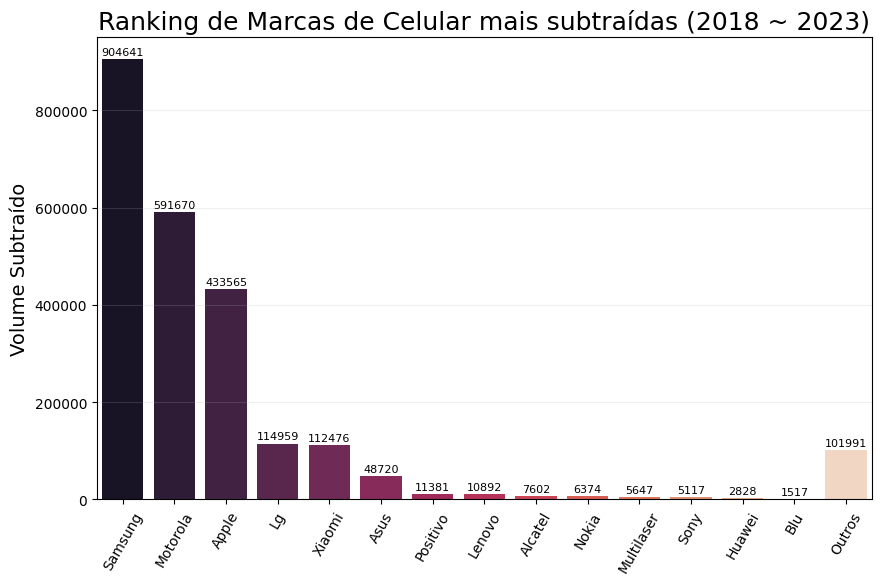

In [7]:
consulta = """
SELECT
    [rank]
,   [marcaCelular]
,   [volume]
FROM [Analise].[RankMarcaCelular]
"""

df = consultar_banco(consulta)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="marcaCelular", y="volume", data=df, palette="rocket")
ax.set_title("Ranking de Marcas de Celular mais subtraídas (2018 ~ 2023)", fontsize=18)
ax.set_xlabel('')
ax.set_ylabel("Volume Subtraído", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
ax.grid(axis='y', alpha=0.2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2,
                 p.get_height()),
                 ha='center',
                 va='center',
                 fontsize=8,
                 xytext=(0, 5),
                 textcoords='offset points')
fig = plt.gcf()
plt.show()

# salva a gráfico
fig.savefig('Graficos/marcas_celular_subtraidas.png', transparent=False, dpi=300, bbox_inches='tight')

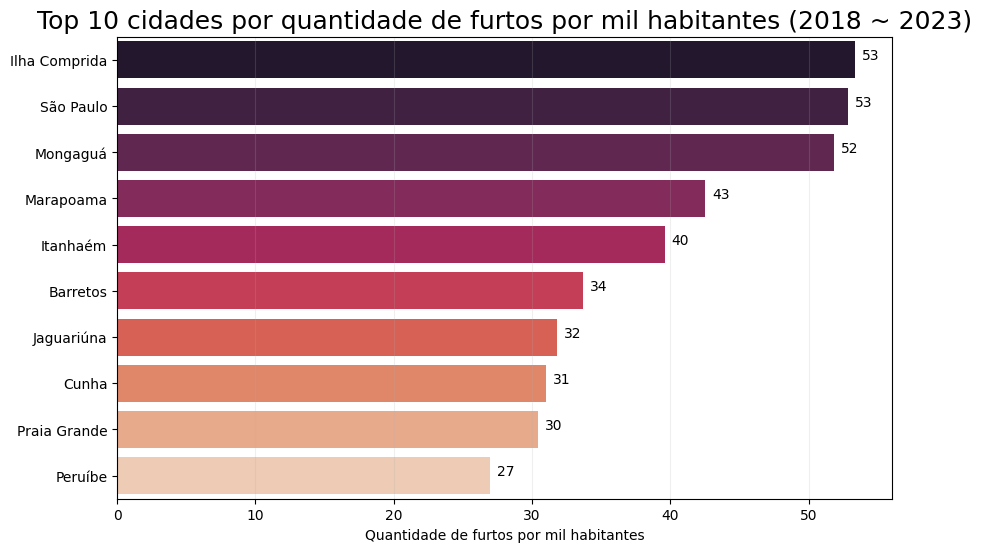

In [40]:
consulta = """
SELECT TOP 10
    [cidade]
,   [boletimPorMilHabitantes]
FROM [Analise].[RankGeral]
WHERE [idCategoria] = 1
ORDER BY [rankBoletinsPorMilHabitantes]
"""

df = consultar_banco(consulta)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="boletimPorMilHabitantes", y="cidade", data=df, orient ='h', palette="rocket")
ax.set_title("Top 10 cidades por quantidade de furtos por mil habitantes (2018 ~ 2023)", fontsize=18)
ax.set(xlabel='Quantidade de furtos por mil habitantes', ylabel='')
ax.grid(axis='x', alpha=0.2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),
                (p.get_x() + p.get_width(),
                 p.get_y() + p.get_height() / 2.),
                 xytext=(5, 0),
                 textcoords='offset points')
fig = plt.gcf()
plt.show()

# salva a gráfico
fig.savefig('Graficos/furtos_por_mil_habitantes.png', transparent=False, dpi=300, bbox_inches='tight')

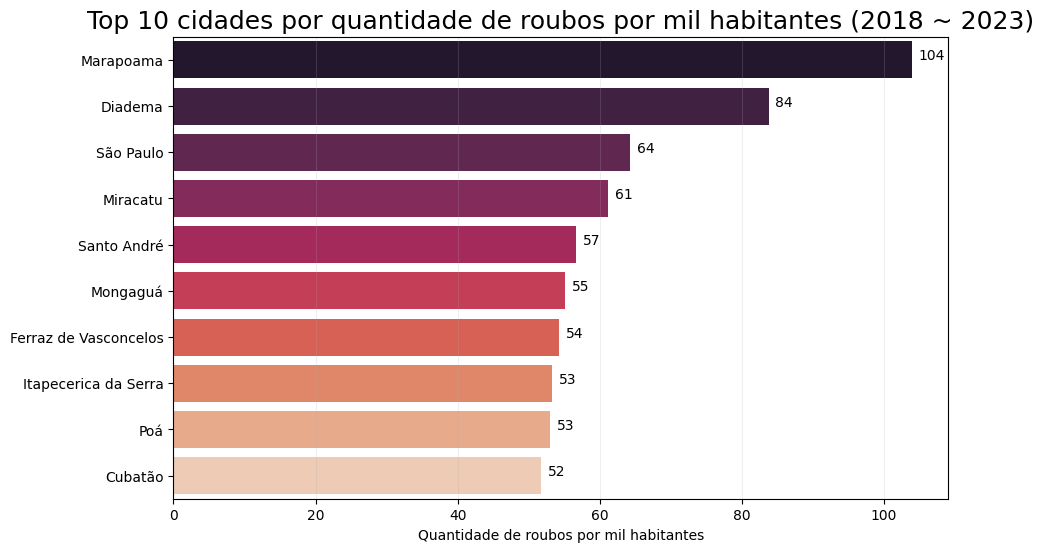

In [38]:
consulta = """
SELECT TOP 10
    [cidade]
,   [boletimPorMilHabitantes]
FROM [Analise].[RankGeral]
WHERE [idCategoria] = 2
ORDER BY [rankBoletinsPorMilHabitantes]
"""

df = consultar_banco(consulta)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="boletimPorMilHabitantes", y="cidade", data=df, orient ='h', palette="rocket")
ax.set_title("Top 10 cidades por quantidade de roubos por mil habitantes (2018 ~ 2023)", fontsize=18)
ax.set(xlabel='Quantidade de roubos por mil habitantes', ylabel='')
ax.grid(axis='x', alpha=0.2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),
                (p.get_x() + p.get_width(),
                 p.get_y() + p.get_height() / 2.),
                 xytext=(5, 0),
                 textcoords='offset points')
fig = plt.gcf()
plt.show()

# salva a gráfico
fig.savefig('Graficos/roubos_por_mil_habitantes.png', transparent=False, dpi=300, bbox_inches='tight')

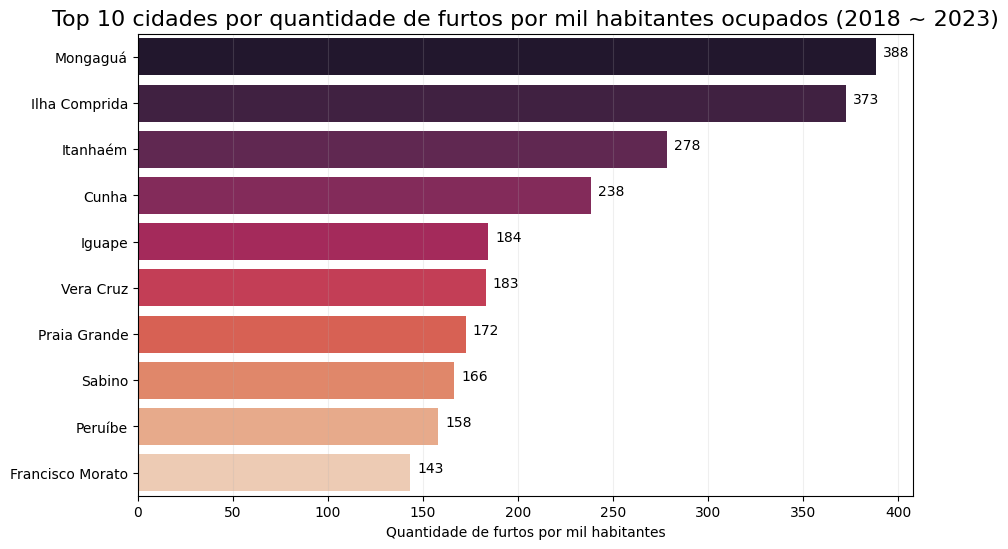

In [39]:
consulta = """
SELECT TOP 10
    [cidade]
,   [boletimPorMilHabitantesOcupado]
FROM [Analise].[RankGeral]
WHERE [idCategoria] = 1
ORDER BY [rankBoletinsPorMilHabitantesOcupado]
"""

df = consultar_banco(consulta)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="boletimPorMilHabitantesOcupado", y="cidade", data=df, orient ='h', palette="rocket")
ax.set_title("Top 10 cidades por quantidade de furtos por mil habitantes ocupados (2018 ~ 2023)", fontsize=16)
ax.set(xlabel='Quantidade de furtos por mil habitantes', ylabel='')
ax.grid(axis='x', alpha=0.2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),
                (p.get_x() + p.get_width(),
                 p.get_y() + p.get_height() / 2.),
                 xytext=(5, 0),
                 textcoords='offset points')
fig = plt.gcf()
plt.show()

# salva a gráfico
fig.savefig('Graficos/furtos_por_mil_habitantes_ocupados.png', transparent=False, dpi=300, bbox_inches='tight')

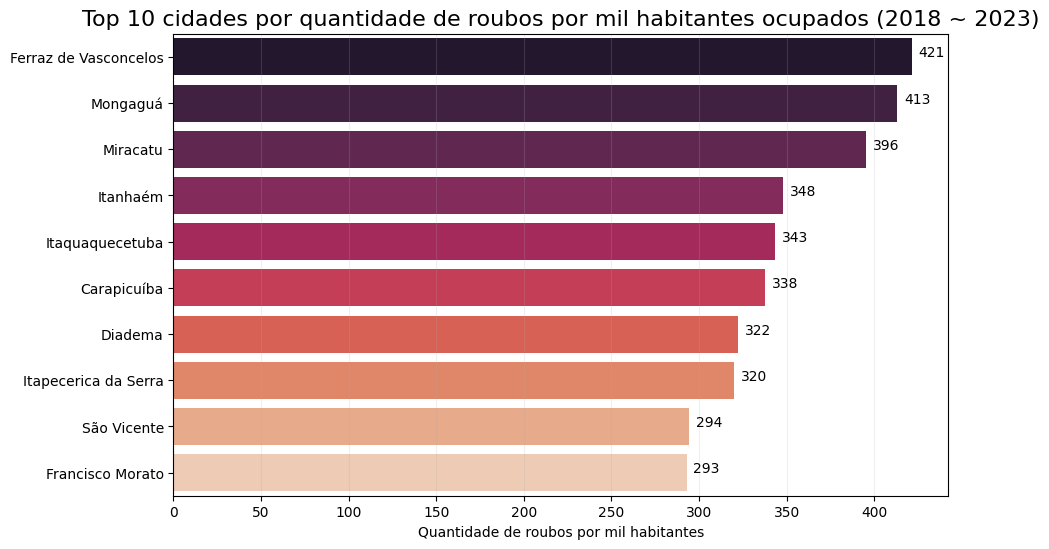

In [34]:
consulta = """
SELECT TOP 10
    [cidade]
,   [boletimPorMilHabitantesOcupado]
FROM [Analise].[RankGeral]
WHERE [idCategoria] = 2
ORDER BY [rankBoletinsPorMilHabitantesOcupado]
"""

df = consultar_banco(consulta)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="boletimPorMilHabitantesOcupado", y="cidade", data=df, orient ='h', palette="rocket")
ax.set_title("Top 10 cidades por quantidade de roubos por mil habitantes ocupados (2018 ~ 2023)", fontsize=16)
ax.set(xlabel='Quantidade de roubos por mil habitantes', ylabel='')
ax.grid(axis='x', alpha=0.2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),
                (p.get_x() + p.get_width(),
                 p.get_y() + p.get_height() / 2.),
                 xytext=(5, 0),
                 textcoords='offset points')
fig = plt.gcf()
plt.show()

# salva a gráfico
fig.savefig('Graficos/roubos_por_mil_habitantes_ocupados.png', transparent=False, dpi=300, bbox_inches='tight')

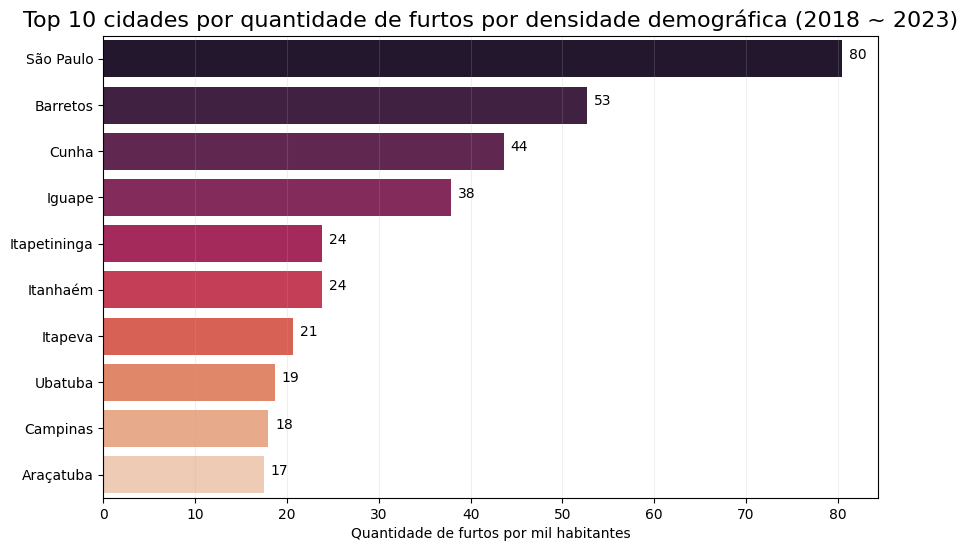

In [37]:
consulta = """
SELECT TOP 10
    [cidade]
,   [boletimPorDensidadeDemografica]
FROM [Analise].[RankGeral]
WHERE [idCategoria] = 1
ORDER BY [rankBoletinsPorDensidadeDemografica]
"""

df = consultar_banco(consulta)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="boletimPorDensidadeDemografica", y="cidade", data=df, orient ='h', palette="rocket")
ax.set_title("Top 10 cidades por quantidade de furtos por densidade demográfica (2018 ~ 2023)", fontsize=16)
ax.set(xlabel='Quantidade de furtos por mil habitantes', ylabel='')
ax.grid(axis='x', alpha=0.2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),
                (p.get_x() + p.get_width(),
                 p.get_y() + p.get_height() / 2.),
                 xytext=(5, 0),
                 textcoords='offset points')
fig = plt.gcf()
plt.show()

# salva a gráfico
fig.savefig('Graficos/furtos_por_densidade_demografica.png', transparent=False, dpi=300, bbox_inches='tight')

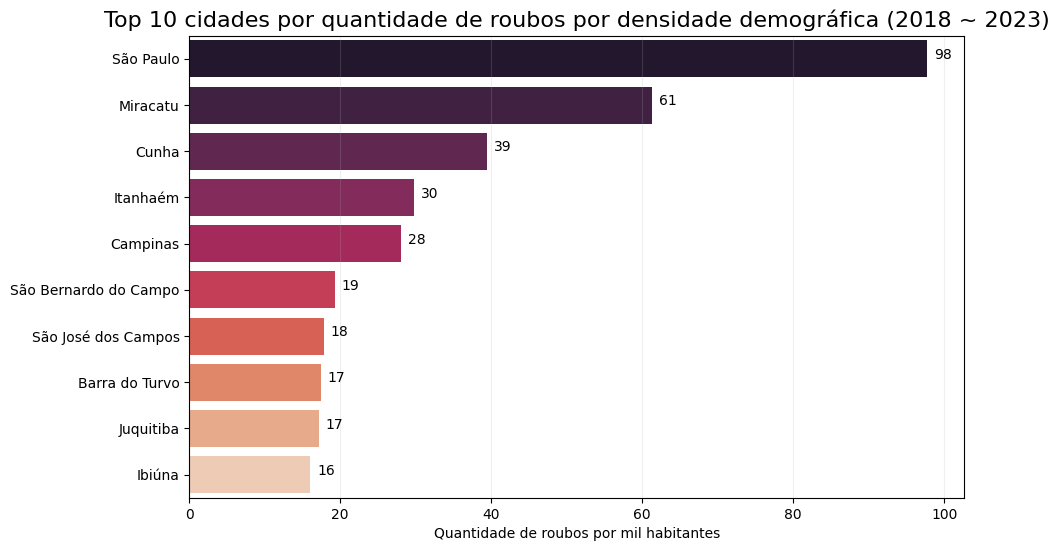

In [41]:
consulta = """
SELECT TOP 10
    [cidade]
,   [boletimPorDensidadeDemografica]
FROM [Analise].[RankGeral]
WHERE [idCategoria] = 2
ORDER BY [rankBoletinsPorDensidadeDemografica]
"""

df = consultar_banco(consulta)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="boletimPorDensidadeDemografica", y="cidade", data=df, orient ='h', palette="rocket")
ax.set_title("Top 10 cidades por quantidade de roubos por densidade demográfica (2018 ~ 2023)", fontsize=16)
ax.set(xlabel='Quantidade de roubos por mil habitantes', ylabel='')
ax.grid(axis='x', alpha=0.2)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()),
                (p.get_x() + p.get_width(),
                 p.get_y() + p.get_height() / 2.),
                 xytext=(5, 0),
                 textcoords='offset points')
fig = plt.gcf()
plt.show()

# salva a gráfico
fig.savefig('Graficos/roubos_por_densidade_demografica.png', transparent=False, dpi=300, bbox_inches='tight')

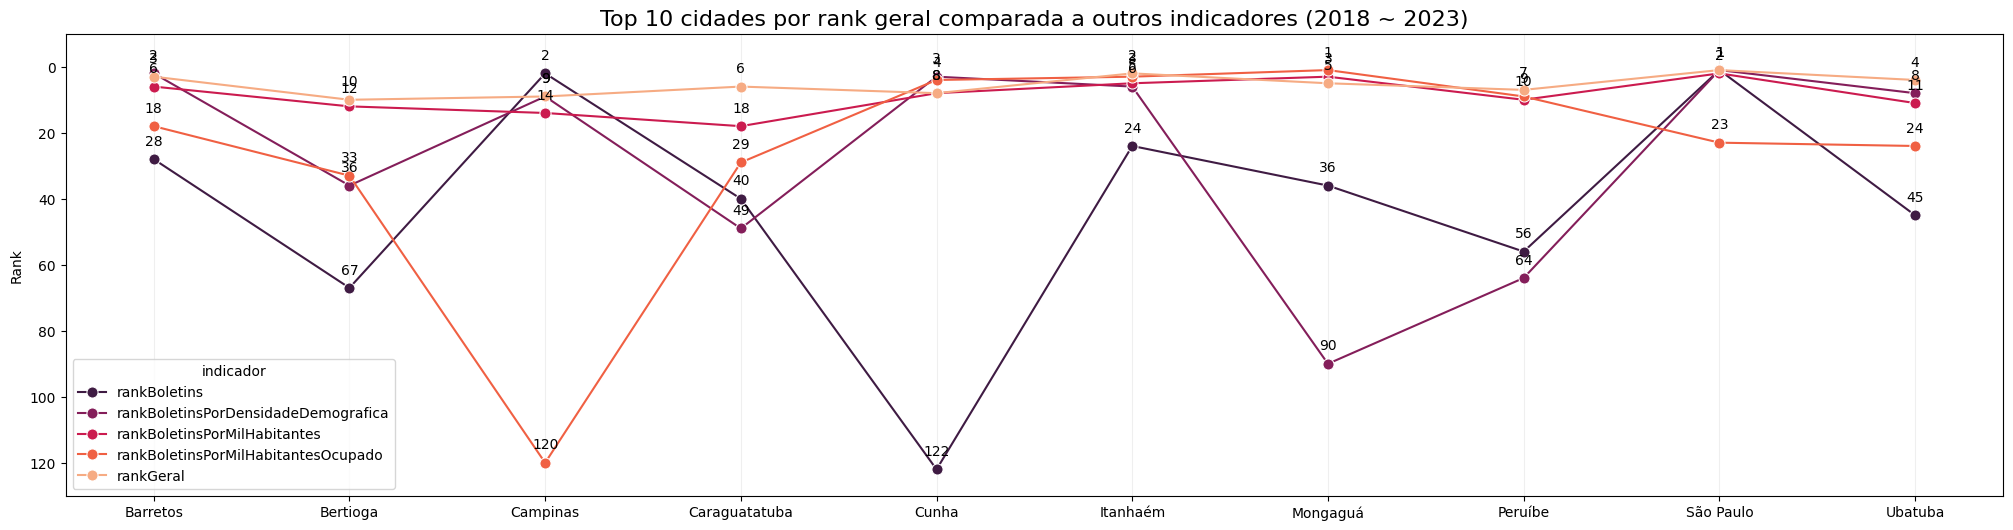

In [57]:
# interminado
consulta = """
SELECT [cidade], [indicador], [valor]
FROM (
    SELECT TOP 10
           [cidade],
           [rankGeral],
           [rankBoletins],
           [rankBoletinsPorMilHabitantes],
           [rankBoletinsPorMilHabitantesOcupado],
           [rankBoletinsPorDensidadeDemografica]
    FROM [Analise].[RankGeral]
    WHERE [idCategoria] = 1
    ORDER BY [rankGeral]
) AS SourceTable
UNPIVOT
(
    [valor] FOR [indicador] IN
    (
        [rankGeral],
        [rankBoletins],
        [rankBoletinsPorMilHabitantes],
        [rankBoletinsPorMilHabitantesOcupado],
        [rankBoletinsPorDensidadeDemografica]
    )
) AS UnpivotedTable
ORDER BY [cidade], [indicador]
"""

df = consultar_banco(consulta)

fig, ax = plt.subplots(figsize=(25, 6))
sns.lineplot(x="cidade", y="valor", data=df, hue='indicador', marker='o', markersize=8, palette="rocket")
ax.set_title("Top 10 cidades por rank geral comparada a outros indicadores (2018 ~ 2023)", fontsize=16)
ax.set(xlabel='', ylabel='Rank')
ax.set_ylim(130, -10)
ax.grid(axis='x', alpha=0.2)
for i, txt in enumerate(df['valor']):
    ax.annotate(f'{txt:.0f}', (df['cidade'][i], df['valor'][i]), textcoords="offset points", xytext=(0,10), ha='center')

fig = plt.gcf()
plt.show()

# salva a gráfico
# fig.savefig('Graficos/roubos_por_densidade_demografica.png', transparent=False, dpi=300, bbox_inches='tight')